In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Creating a model to analyse whether the student will pass or any intervention is needed.

In [2]:
#Load the data
data=pd.read_csv('student-data.csv')

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [4]:
data.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,yes,no,3,2,3,3,3,5,5,no


In [5]:
data.shape

(395, 31)

> We have 395 rows and 31 column as features

In [6]:
#to check the null values
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [7]:
#Pre-processing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [8]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [9]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [10]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
cols=['school','sex','address','famsize','Pstatus','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','passed']
data[cols]=data[cols].apply(LabelEncoder().fit_transform)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,0,0,18,1,0,0,4,4,at_home,teacher,...,0,0,4,3,4,1,1,3,6,0
1,0,0,17,1,0,1,1,1,at_home,other,...,1,0,5,3,3,1,1,3,4,0
2,0,0,15,1,1,1,1,1,at_home,other,...,1,0,4,3,2,2,3,3,10,1
3,0,0,15,1,0,1,4,2,health,services,...,1,1,3,2,2,1,1,5,2,1
4,0,0,16,1,0,1,3,3,other,other,...,0,0,4,3,2,1,2,5,4,1


<AxesSubplot:>

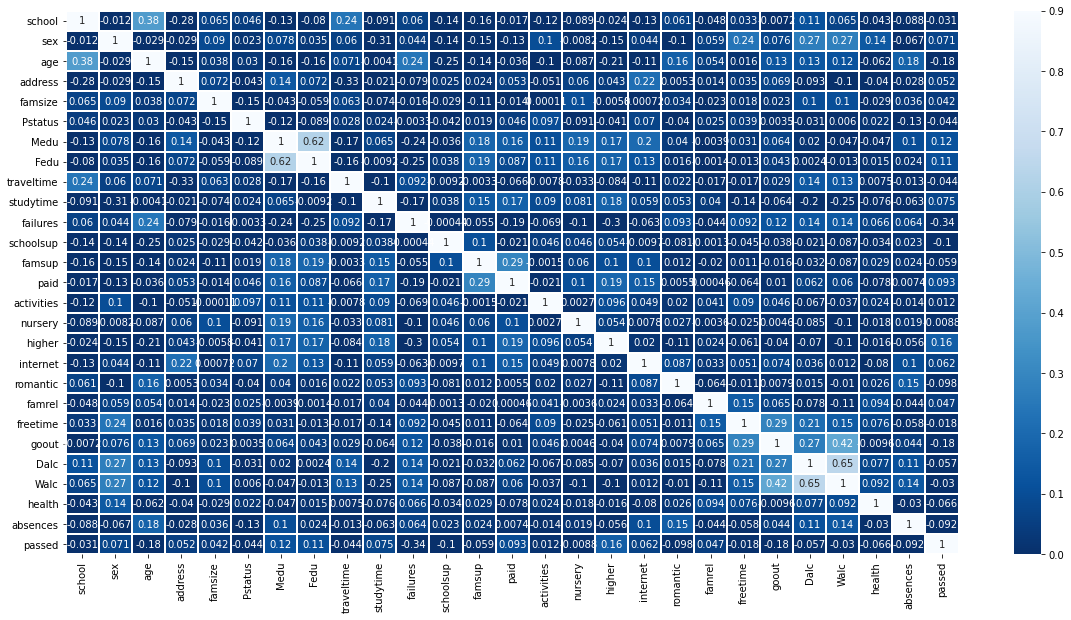

In [11]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corrmatrix,vmin=0,vmax=0.9,annot=True,linewidth=0.2,cmap='Blues_r')

In [12]:
data.dtypes

school         int32
sex            int32
age            int64
address        int32
famsize        int32
Pstatus        int32
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup      int32
famsup         int32
paid           int32
activities     int32
nursery        int32
higher         int32
internet       int32
romantic       int32
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
passed         int32
dtype: object

In [13]:
x=data.drop(['passed','Mjob','Fjob','guardian','reason','school'],axis=1)
y=pd.DataFrame(data['passed'])

In [14]:
#splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [15]:
x_train.shape

(276, 25)

In [16]:
y_train.shape

(276, 1)

In [17]:
x_test.shape

(119, 25)

In [18]:
y_test.shape

(119, 1)

# Random Forest Model

In [19]:
#Build the model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)    
y_pred=rf.predict(x_test)  

<ipython-input-19-375a40e3a433>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


In [20]:
from sklearn.metrics import f1_score,confusion_matrix
f1_score(y_test,y_pred)

0.8114285714285715

In [21]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[15, 24],
       [ 9, 71]], dtype=int64)

> Here we got f1 score as 0.81 it means the model is good
> From the confusion matrix it is clear that there exist 24 and 9 are missclassified in our model

Text(69.0, 0.5, 'Truth')

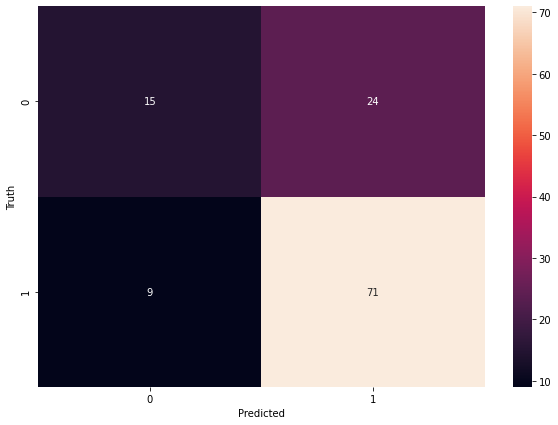

In [22]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#Feature Importance

In [23]:
pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)*100

absences      9.731581
failures      8.916149
age           7.139363
goout         6.706473
freetime      5.697467
health        5.537772
studytime     5.475087
Medu          5.105059
Walc          4.772152
famrel        4.711171
Fedu          4.174388
Dalc          2.951902
traveltime    2.907208
schoolsup     2.812659
romantic      2.676941
sex           2.608211
activities    2.402294
internet      2.397841
famsup        2.368483
famsize       2.103857
nursery       2.072874
paid          2.008096
higher        1.809488
address       1.744437
Pstatus       1.169049
dtype: float64

> Here all the variables have a particular imporance in the data in which the variables abscence,failures,age,goout,health,
  Medu,Freetime,Walc....showing more percentage than other.
> So here, it is better to consider all the variables since it has some role in our model.

#Distribution of prediction probabilities

In [24]:
threshold=0.22
y_pred_prob=rf.predict_proba(x_test)[:,1]
y_pred=(y_pred_prob>threshold).astype(int)

In [25]:
f1_score(y_test,y_pred)

0.8080808080808081

#Fine tuning of Hyperparameter

In [26]:
rf.fit(x_train,y_train)

<ipython-input-26-895403b03771>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestClassifier()

In [27]:
rft=RandomForestClassifier(n_estimators=500,max_depth=10,random_state=42,criterion='entropy')

In [28]:
rft.fit(x_train,y_train)

<ipython-input-28-c26e1322ddde>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rft.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=500,
                       random_state=42)

In [29]:
y_pred=rft.predict(x_test)
f1_score(y_test,y_pred)

0.8176795580110497

#Gradient Boosting

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)

C:\Users\RASHEED\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
f1_score(y_test,y_pred)

0.8323699421965317

> We can see that f1_score is increased from 0.8176 to 0.8323 that is our model is good and all the features that we 
  considered to create this model also helps us to make the model perfect. 

#Extreme Gradient Boosting

In [32]:
import sys
!{sys.executable} -m pip install xgboost

In [34]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

C:\Users\RASHEED\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\RASHEED\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RASHEED\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17:37:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
y_pred=xgb.predict(x_test)

In [36]:
f1_score(y_test,y_pred)

0.7906976744186046

> Here the f1_score is reduced from 0.8323 to 0.7906 while using Extreme gradient boosting so we can make the model much more 
  perfect by finetuning of hyper parameter  
> So, let's consider f1_score obtained from gradient boosting since it is much more greater than the other one .

# Linear Regression Model

In [38]:
x=data.drop(['passed','Mjob','Fjob','guardian','reason','school'],axis=1)
y=pd.DataFrame(data['passed'])

In [39]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [40]:
#To check MSE of the model
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,predictions))

MSE is: 0.19857827052195795


> Here the MSE value is very low, it also indicating our model is good.

# Logistic Regression Model

In [42]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

C:\Users\RASHEED\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RASHEED\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [44]:
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred))
print('Recall is:',recall_score(y_test,y_pred))
print('f1 is:',f1_score(y_test,y_pred))

Accuracy is: 0.7058823529411765
Precision is: 0.7368421052631579
Recall is: 0.875
f1 is: 0.7999999999999999


In [45]:
confusion_matrix(y_test,y_pred)

array([[14, 25],
       [10, 70]], dtype=int64)

> Here we got Accuracy, Precision ,Recall and f1 score as 0.7058,0.736,0.875 and 0.799 respectively.
> There are 35 misclassification.

# K-NN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,5)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

C:\Users\RASHEED\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\RASHEED\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [47]:
acc=accuracy_score(y_test,y_pred)
acc_values.append(acc)
acc_values

[0.6890756302521008, 0.6050420168067226, 0.6050420168067226]

In [48]:
classifier=KNeighborsClassifier(n_neighbors=15,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)


C:\Users\RASHEED\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [49]:
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred))
print('Recall is:',recall_score(y_test,y_pred))
print('f1 is:',f1_score(y_test,y_pred))

Accuracy is: 0.7310924369747899
Precision is: 0.7222222222222222
Recall is: 0.975
f1 is: 0.8297872340425532


In [50]:
confusion_matrix(y_test,y_pred)

array([[ 9, 30],
       [ 2, 78]], dtype=int64)

> In the K-NN model we randomly choose k value as 15 and by fitting corresponding model the accuracy ,precision recall and f1     score is obtained as 0.731,0.722,0.975 and 0.829 respectively.
> From the confusion matrix it can be seen that there exist 32 misclassification.

In [49]:
#Standard scaling

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

#Logistic Regression Model after standard scaling

In [50]:
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

C:\Users\RASHEED\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred))
print('Recall is:',recall_score(y_test,y_pred))
print('f1 is:',f1_score(y_test,y_pred))

Accuracy is: 0.6974789915966386
Precision is: 0.7391304347826086
Recall is: 0.85
f1 is: 0.7906976744186046


#K-NN after standard scaling

In [52]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,5)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)
    

C:\Users\RASHEED\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\RASHEED\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [53]:
acc=accuracy_score(y_test,y_pred)
acc_values.append(acc)

In [52]:
classifier=KNeighborsClassifier(n_neighbors=15,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred))
print('Recall is:',recall_score(y_test,y_pred))
print('f1 is:',f1_score(y_test,y_pred))

C:\Users\RASHEED\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy is: 0.7310924369747899
Precision is: 0.7222222222222222
Recall is: 0.975
f1 is: 0.8297872340425532


In [54]:
confusion_matrix(y_test,y_pred)

array([[ 9, 30],
       [ 2, 78]], dtype=int64)

> After standard scaling we fit Logistic regression and K-NN but there is no increase in accuracy ,precision and recall
  when compare it with the model before standard scaling

> From the above model we can conclude that f1 score obtained from Random forest by Gradient boosting is higher than that of 
  other model and the f1 is score is 0.8323.
> So the model we created using random forest is good and the features related with the model should help to predict 
  whether the student will pass or fail or any intervention is needed.